<a href="https://colab.research.google.com/github/Sg134-ch/Machine-Learning-Projects-/blob/main/Titanic_MLPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
print("✓ Libraries imported successfully!")
from google.colab import files
import io
print("\n📁 Please upload your Titanic dataset files:")
print("You need to upload 3 files: train.csv, test.csv, and gender_submission.csv")
print("\nClick 'Choose Files' below and select all three CSV files at once...")
uploaded = files.upload()
print("\n✓ Files uploaded successfully!")
print(f"Uploaded files: {list(uploaded.keys())}")

✓ Libraries imported successfully!

📁 Please upload your Titanic dataset files:
You need to upload 3 files: train.csv, test.csv, and gender_submission.csv

Click 'Choose Files' below and select all three CSV files at once...


Saving gender_submission.csv to gender_submission (1).csv
Saving train.csv to train (1).csv
Saving test.csv to test (1).csv

✓ Files uploaded successfully!
Uploaded files: ['gender_submission (1).csv', 'train (1).csv', 'test (1).csv']


In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')
print("\n" + "="*50)
print("DATA LOADED SUCCESSFULLY!")
print("="*50)
print(f"Training data shape: {train_df.shape}")
print(f"Test data shape: {test_df.shape}")
print(f"Gender submission shape: {gender_submission.shape}")
print("\n" + "="*50)


DATA LOADED SUCCESSFULLY!
Training data shape: (891, 12)
Test data shape: (418, 11)
Gender submission shape: (418, 2)



In [ ]:
print("\nFirst few rows of training data:")
print(train_df.head(10))

print("\n" + "="*50)
print("\nDataset Info:")
print(train_df.info())

print("\n" + "="*50)
print("\nStatistical Summary:")
print(train_df.describe())

print("\n" + "="*50)
print("\nMissing Values in Training Data:")
missing_train = train_df.isnull().sum()
print(missing_train[missing_train > 0])

print("\n" + "="*50)
print("\nMissing Values in Test Data:")
missing_test = test_df.isnull().sum()
print(missing_test[missing_test > 0])

print("\n" + "="*50)
print("\nSurvival Rate:")
survival_rate = train_df['Survived'].value_counts(normalize=True)
print(survival_rate)
print(f"\nSurvival Rate: {survival_rate[1]*100:.2f}%")
print(f"Death Rate: {survival_rate[0]*100:.2f}%")


First few rows of training data:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            M

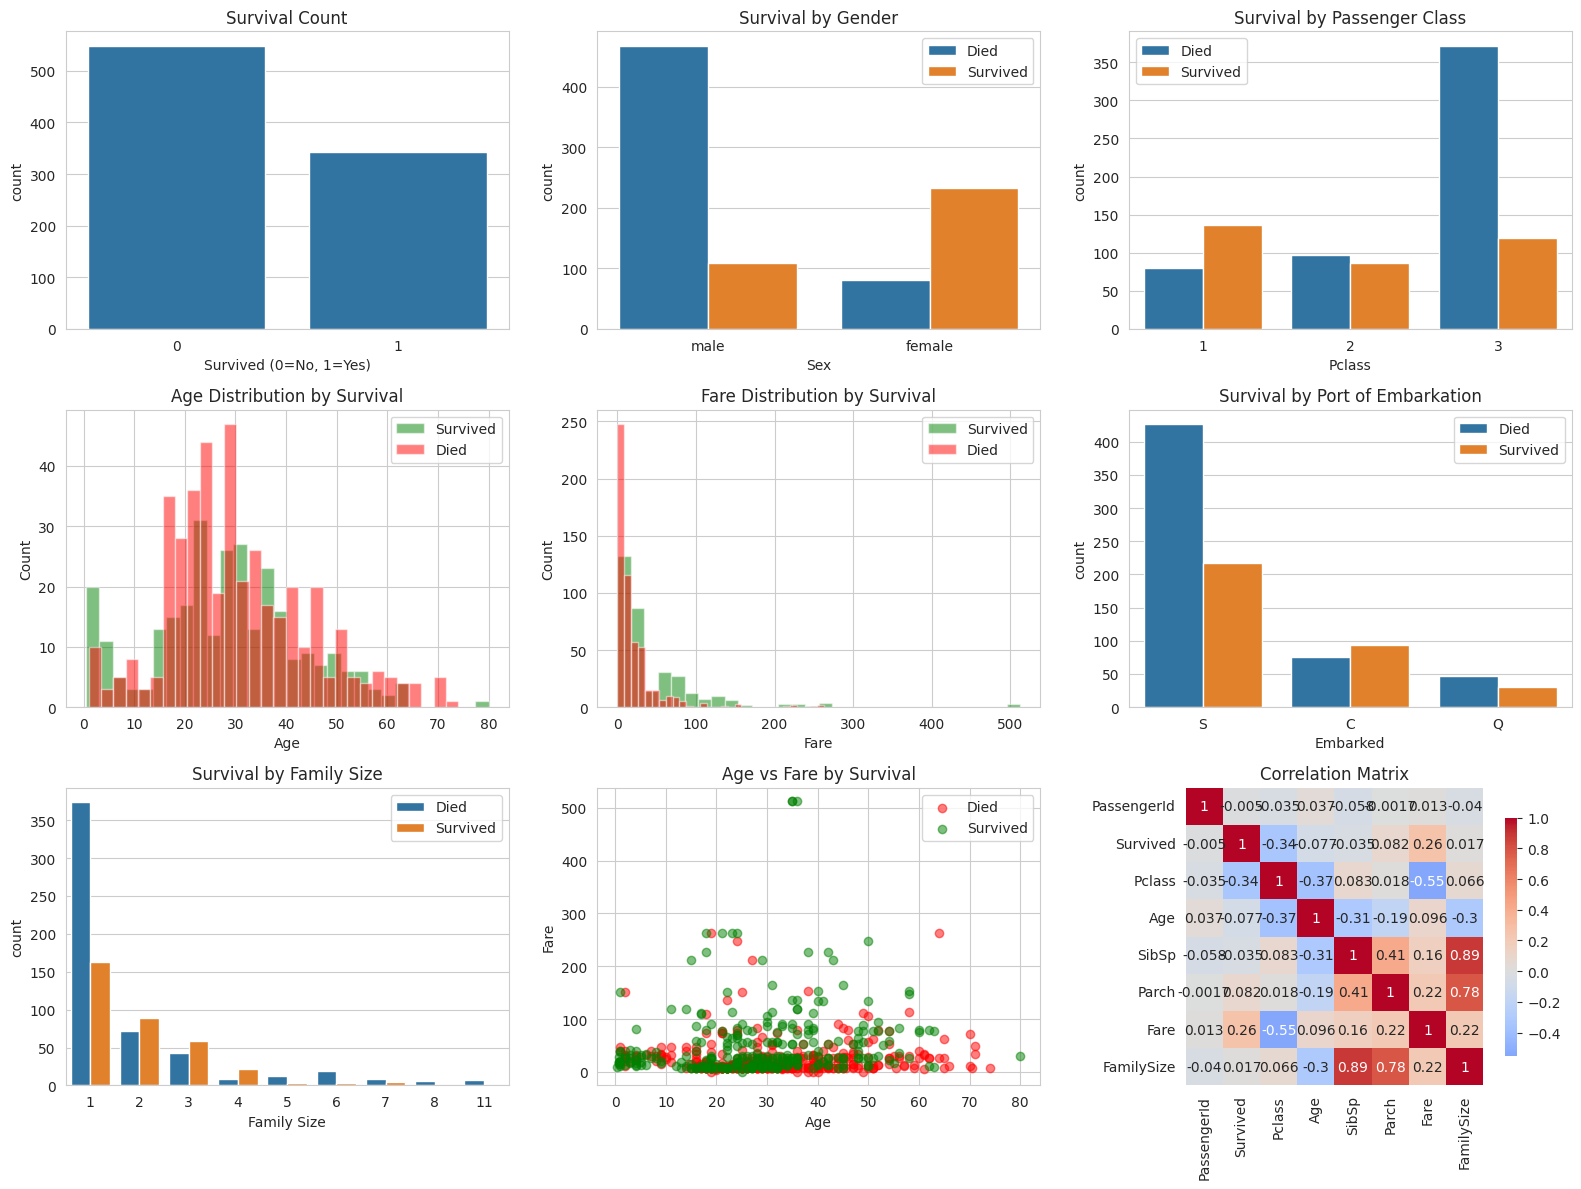

In [ ]:
fig = plt.figure(figsize=(16, 12))
# 1. Survival Count
plt.subplot(3, 3, 1)
sns.countplot(data=train_df, x='Survived')
plt.title('Survival Count')
plt.xlabel('Survived (0=No, 1=Yes)')
# 2. Survival by Gender
plt.subplot(3, 3, 2)
sns.countplot(data=train_df, x='Sex', hue='Survived')
plt.title('Survival by Gender')
plt.legend(['Died', 'Survived'])
# 3. Survival by Passenger Class
plt.subplot(3, 3, 3)
sns.countplot(data=train_df, x='Pclass', hue='Survived')
plt.title('Survival by Passenger Class')
plt.legend(['Died', 'Survived'])
# 4. Age Distribution
plt.subplot(3, 3, 4)
train_df[train_df['Survived']==1]['Age'].hist(alpha=0.5, bins=30, label='Survived', color='green')
train_df[train_df['Survived']==0]['Age'].hist(alpha=0.5, bins=30, label='Died', color='red')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution by Survival')
plt.legend()
# 5. Fare Distribution
plt.subplot(3, 3, 5)
train_df[train_df['Survived']==1]['Fare'].hist(alpha=0.5, bins=30, label='Survived', color='green')
train_df[train_df['Survived']==0]['Fare'].hist(alpha=0.5, bins=30, label='Died', color='red')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Fare Distribution by Survival')
plt.legend()
# 6. Survival by Embarked
plt.subplot(3, 3, 6)
sns.countplot(data=train_df, x='Embarked', hue='Survived')
plt.title('Survival by Port of Embarkation')
plt.legend(['Died', 'Survived'])
# 7. Family Size Distribution
plt.subplot(3, 3, 7)
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
sns.countplot(data=train_df, x='FamilySize', hue='Survived')
plt.title('Survival by Family Size')
plt.legend(['Died', 'Survived'])
plt.xlabel('Family Size')
# 8. Age vs Fare
plt.subplot(3, 3, 8)
plt.scatter(train_df[train_df['Survived']==0]['Age'],
           train_df[train_df['Survived']==0]['Fare'],
           alpha=0.5, c='red', label='Died')
plt.scatter(train_df[train_df['Survived']==1]['Age'],
           train_df[train_df['Survived']==1]['Fare'],
           alpha=0.5, c='green', label='Survived')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare by Survival')
plt.legend()
# 9. Correlation Heatmap
plt.subplot(3, 3, 9)
numeric_cols = train_df.select_dtypes(include=[np.number]).columns
corr_matrix = train_df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, square=True, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix')

plt.tight_layout()
plt.show()

In [ ]:
print("\n" + "="*50)
print("SURVIVAL STATISTICS BY CATEGORY")
print("="*50)
print("\nSurvival by Gender:")
print(train_df.groupby('Sex')['Survived'].agg(['count', 'sum', 'mean']))
print("\nSurvival by Class:")
print(train_df.groupby('Pclass')['Survived'].agg(['count', 'sum', 'mean']))
print("\nSurvival by Embarkation Port:")
print(train_df.groupby('Embarked')['Survived'].agg(['count', 'sum', 'mean']))

def engineer_features(df):
    """Create new features and clean data"""
    df = df.copy()

    # Fill missing Age with median
    df['Age'].fillna(df['Age'].median(), inplace=True)

    # Fill missing Embarked with mode
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

    # Fill missing Fare with median
    df['Fare'].fillna(df['Fare'].median(), inplace=True)

    # Create FamilySize feature
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

    # Create IsAlone feature
    df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

    # Create Title feature from Name
    df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

    # Group rare titles
    title_mapping = {
        'Mr': 'Mr', 'Miss': 'Miss', 'Mrs': 'Mrs', 'Master': 'Master',
        'Rev': 'Rare', 'Dr': 'Rare', 'Col': 'Rare', 'Major': 'Rare',
        'Mlle': 'Miss', 'Countess': 'Rare', 'Ms': 'Miss', 'Lady': 'Rare',
        'Jonkheer': 'Rare', 'Don': 'Rare', 'Dona': 'Rare', 'Mme': 'Mrs',
        'Capt': 'Rare', 'Sir': 'Rare'
    }
    df['Title'] = df['Title'].map(title_mapping)
    df['Title'].fillna('Rare', inplace=True)

    # Create Age groups
    df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100],
                            labels=['Child', 'Teen', 'Adult', 'Middle', 'Senior'])

    # Create Fare groups
    df['FareGroup'] = pd.qcut(df['Fare'], q=4, labels=['Low', 'Medium', 'High', 'VeryHigh'], duplicates='drop')

    # Convert categorical variables to numeric
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

    # One-hot encode Title
    title_dummies = pd.get_dummies(df['Title'], prefix='Title')
    df = pd.concat([df, title_dummies], axis=1)

    # One-hot encode AgeGroup
    age_dummies = pd.get_dummies(df['AgeGroup'], prefix='AgeGroup')
    df = pd.concat([df, age_dummies], axis=1)

    # One-hot encode FareGroup
    fare_dummies = pd.get_dummies(df['FareGroup'], prefix='FareGroup')
    df = pd.concat([df, fare_dummies], axis=1)

    return df


SURVIVAL STATISTICS BY CATEGORY

Survival by Gender:
        count  sum      mean
Sex                         
female    314  233  0.742038
male      577  109  0.188908

Survival by Class:
        count  sum      mean
Pclass                      
1         216  136  0.629630
2         184   87  0.472826
3         491  119  0.242363

Survival by Embarkation Port:
          count  sum      mean
Embarked                      
C           168   93  0.553571
Q            77   30  0.389610
S           644  217  0.336957



FEATURE ENGINEERING
✓ Feature engineering completed!
Original training data shape: (891, 13)
Processed training data shape: (891, 31)

New features created: 18

Training set size: 712
Validation set size: 179
Number of features: 23

Features used: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'IsAlone', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare', 'AgeGroup_Child', 'AgeGroup_Teen', 'AgeGroup_Adult', 'AgeGroup_Middle', 'AgeGroup_Senior', 'FareGroup_Low', 'FareGroup_Medium', 'FareGroup_High', 'FareGroup_VeryHigh']

MODEL TRAINING

Training Logistic Regression...
Validation Accuracy: 0.8045

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

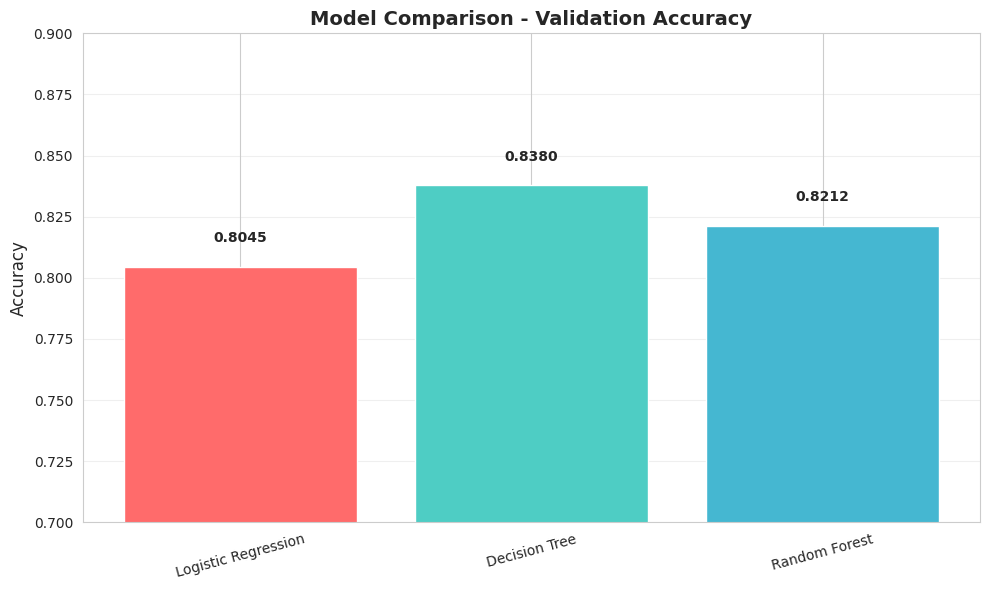

In [ ]:

print("\n" + "="*50)
print("FEATURE ENGINEERING")
print("="*50)

train_processed = engineer_features(train_df)
test_processed = engineer_features(test_df)

print("✓ Feature engineering completed!")
print(f"Original training data shape: {train_df.shape}")
print(f"Processed training data shape: {train_processed.shape}")
print(f"\nNew features created: {train_processed.shape[1] - train_df.shape[1]}")

# Select features for modeling
feature_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
                'FamilySize', 'IsAlone'] + \
               [col for col in train_processed.columns if col.startswith(('Title_', 'AgeGroup_', 'FareGroup_'))]

X = train_processed[feature_cols]
y = train_processed['Survived']

# Split data for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Number of features: {X_train.shape[1]}")
print(f"\nFeatures used: {feature_cols}")

print("\n" + "="*50)
print("MODEL TRAINING")
print("="*50)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, max_depth=7)
}

results = {}

for name, model in models.items():
    print(f"\n{'='*50}")
    print(f"Training {name}...")
    print('='*50)

    # Train model
    model.fit(X_train, y_train)

    # Predict on validation set
    y_pred = model.predict(X_val)

    # Calculate accuracy
    accuracy = accuracy_score(y_val, y_pred)
    results[name] = accuracy

    print(f"Validation Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_val, y_pred))

    # Cross-validation score
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

# Plot model comparison
plt.figure(figsize=(10, 6))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
bars = plt.bar(results.keys(), results.values(), color=colors)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Comparison - Validation Accuracy', fontsize=14, fontweight='bold')
plt.ylim([0.7, 0.9])
plt.xticks(rotation=15)
for i, (name, acc) in enumerate(results.items()):
    plt.text(i, acc + 0.01, f'{acc:.4f}', ha='center', fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


FINAL MODEL TRAINING
✓ Final model trained on full training data!

Top 15 Most Important Features:
               Feature  Importance
1                  Sex    0.175944
11            Title_Mr    0.169166
5                 Fare    0.114398
0               Pclass    0.096993
10          Title_Miss    0.077617
2                  Age    0.067298
12           Title_Mrs    0.056763
7           FamilySize    0.053963
3                SibSp    0.033455
6             Embarked    0.021052
4                Parch    0.019818
22  FareGroup_VeryHigh    0.018340
19       FareGroup_Low    0.013978
9         Title_Master    0.011500
14      AgeGroup_Child    0.010762


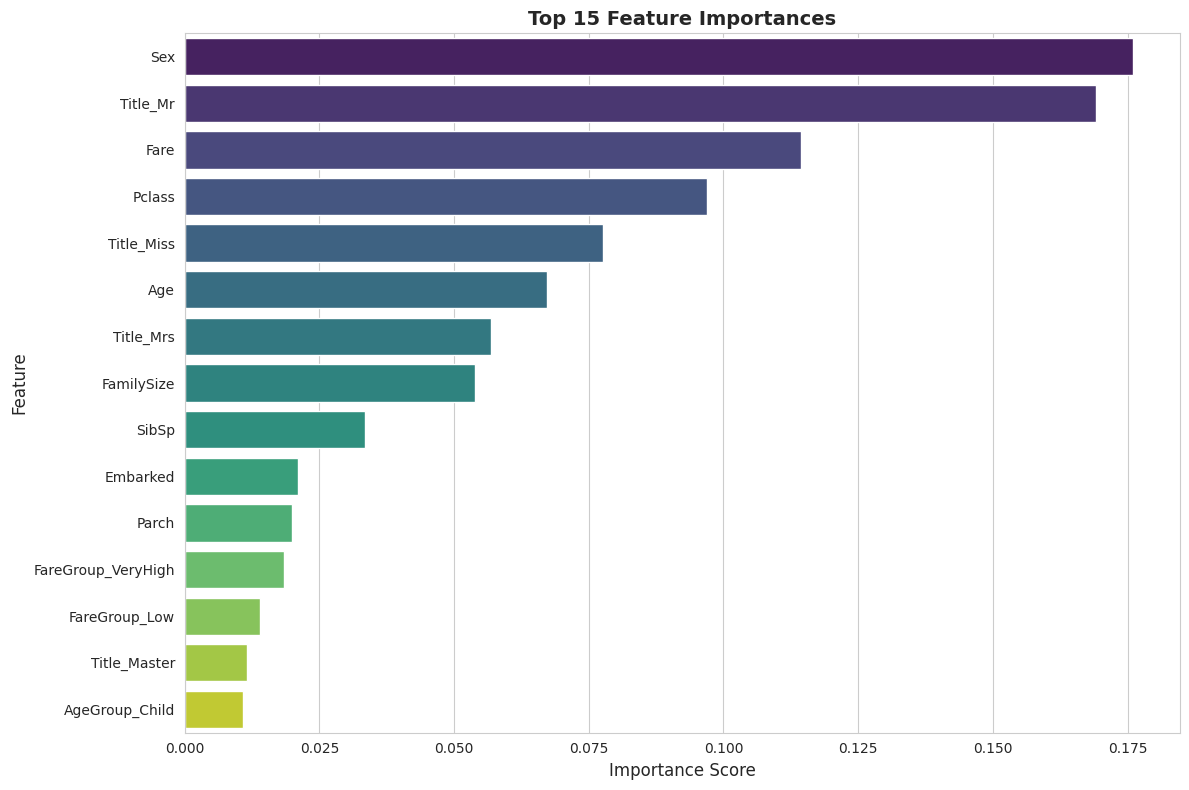


GENERATING PREDICTIONS
✓ Predictions completed!

Total predictions made: 418

First 10 predictions:
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1
5          897         0
6          898         1
7          899         0
8          900         1
9          901         0

Last 10 predictions:
     PassengerId  Survived
408         1300         1
409         1301         1
410         1302         1
411         1303         1
412         1304         1
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

Prediction distribution:
Survived
0    267
1    151
Name: count, dtype: int64

Predicted Survival Rate: 36.12%
Predicted Death Rate: 63.88%

COMPARISON WITH BASELINE

Match rate with gender baseline: 91.63%
Differences from baseline: 8.37%

Sample comparison (first 10 rows):
   PassengerId  Survived  Ge

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


                    FINAL SUMMARY
Best Model:                    Random Forest Classifier
Validation Accuracy:           0.8212
Total Features Used:           23
Total Predictions:             418
Predicted Survival Rate:       36.12%


In [ ]:


print("\n" + "="*50)
print("FINAL MODEL TRAINING")
print("="*50)

final_model = RandomForestClassifier(n_estimators=200, random_state=42,
                                     max_depth=7, min_samples_split=5)
final_model.fit(X, y)

print("✓ Final model trained on full training data!")

feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': final_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 15 Most Important Features:")
print(feature_importance.head(15))

# Plot feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
sns.barplot(data=top_features, x='Importance', y='Feature', palette='viridis')
plt.title('Top 15 Feature Importances', fontsize=14, fontweight='bold')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()



print("\n" + "="*50)
print("GENERATING PREDICTIONS")
print("="*50)

# Prepare test data
X_test = test_processed[feature_cols]

# Make predictions
predictions = final_model.predict(X_test)

# Create submission file
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': predictions
})

print("✓ Predictions completed!")
print(f"\nTotal predictions made: {len(submission)}")
print("\nFirst 10 predictions:")
print(submission.head(10))

print("\nLast 10 predictions:")
print(submission.tail(10))

print("\nPrediction distribution:")
pred_dist = submission['Survived'].value_counts()
print(pred_dist)
print(f"\nPredicted Survival Rate: {(pred_dist[1] / len(submission) * 100):.2f}%")
print(f"Predicted Death Rate: {(pred_dist[0] / len(submission) * 100):.2f}%")



print("\n" + "="*50)
print("COMPARISON WITH BASELINE")
print("="*50)

# Compare predictions with gender baseline
comparison = submission.copy()
comparison['Gender_Baseline'] = gender_submission['Survived']
comparison['Match'] = (comparison['Survived'] == comparison['Gender_Baseline']).astype(int)

match_rate = comparison['Match'].mean()
print(f"\nMatch rate with gender baseline: {match_rate*100:.2f}%")
print(f"Differences from baseline: {(1-match_rate)*100:.2f}%")

print("\nSample comparison (first 10 rows):")
print(comparison.head(10))

## 12. Save Submission File

# Save to CSV
submission.to_csv('titanic_submission.csv', index=False)
print("\n" + "="*50)
print("✓ Submission file saved as 'titanic_submission.csv'")
print("="*50)

# Download the file
print("\nDownloading submission file...")
files.download('titanic_submission.csv')

## 13. Summary

print("\n" + "="*60)
print(" "*20 + "FINAL SUMMARY")
print("="*60)
print(f"{'Best Model:':<30} Random Forest Classifier")
print(f"{'Validation Accuracy:':<30} {results['Random Forest']:.4f}")
print(f"{'Total Features Used:':<30} {len(feature_cols)}")
print(f"{'Total Predictions:':<30} {len(submission)}")
print(f"{'Predicted Survival Rate:':<30} {(pred_dist[1] / len(submission) * 100):.2f}%")
print("="*60)
